# XNOR
## Name: Rohan Rajesh Kalbag
## Roll: 20d170033

## References
- https://pytorch.org/tutorials/

- https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

- https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html#

- https://github.com/nalbarr/pytorch-spine-binary-classifier



### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Randomly generating 10k points

In [2]:
#generating 10k points 
np.random.seed(0)
data = 2*np.random.uniform(size=(10000, 2)) - 1

### Function to classify the point and store label in third coordinate

In [3]:
plt.rcParams['figure.figsize'] = 10, 8
#point labelling function
def point_labeller(a):
  if(a[0]>0 and a[1]>0) or (a[0]< 0 and a[1]< 0):
    return 1
  elif(a[0]==0 and a[1]==0):
    return -1
  else:
    return 0

#list to hold labelled data
labelled_data = []

for i in range(len(data)):
  k = list(data[i])
  #third coordinate will be the label
  labelled_data += [k + [point_labeller(k)]]

### Creation of DataFrame and Test:Train:Validation Split

In [4]:
data = pd.DataFrame(labelled_data)
data.columns = ['X','Y','Label']

In [5]:
X = data[['X','Y']]
y = data[['Label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [6]:
X_valid,X_test, y_valid,y_test = train_test_split(X_test,y_test,test_size=0.5)

### Normalizing data

In [7]:
#Normalize input
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_valid = scaler.fit_transform(X_valid)

## Dataset Module

In [8]:
EPOCHS = 100
BATCH = 16
LR = 1e-3

In [9]:
class MyDatatype(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


In [10]:
train_data = MyDatatype(torch.Tensor(X_train), torch.Tensor(np.array(y_train)))
test_data = MyDatatype(torch.Tensor(X_test), torch.Tensor(np.array(y_test)))
valid_data = MyDatatype(torch.Tensor(X_valid), torch.Tensor(np.array(y_valid)))


## DataLoaders

In [11]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH, shuffle=True,drop_last=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH,drop_last=True,shuffle=True)
valid_loader = DataLoader(dataset=valid_data, batch_size=BATCH,drop_last=True,shuffle=True)

# Neural Network

In [13]:
class NeuralNet(nn.Module):
    def __init__(self, hidden):
        super(NeuralNet, self).__init__()
        self.layer_1 = nn.Linear(2, hidden) 
        self.layer_2 = nn.Linear(hidden, hidden)
        self.layer_out = nn.Linear(hidden, 1) 
        
        self.relu = nn.ReLU()
        self.batchnorm1 = nn.BatchNorm1d(hidden)
        self.batchnorm2 = nn.BatchNorm1d(hidden)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.layer_out(x)
        
        return x

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Function to calculate binary accuracy

In [15]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

## Main Train/Validation loop to identify best hidden layer size

NeuralNet(
  (layer_1): Linear(in_features=2, out_features=2, bias=True)
  (layer_2): Linear(in_features=2, out_features=2, bias=True)
  (layer_out): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


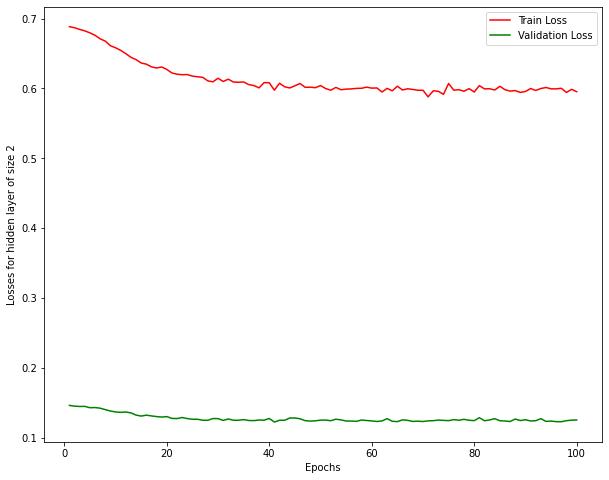

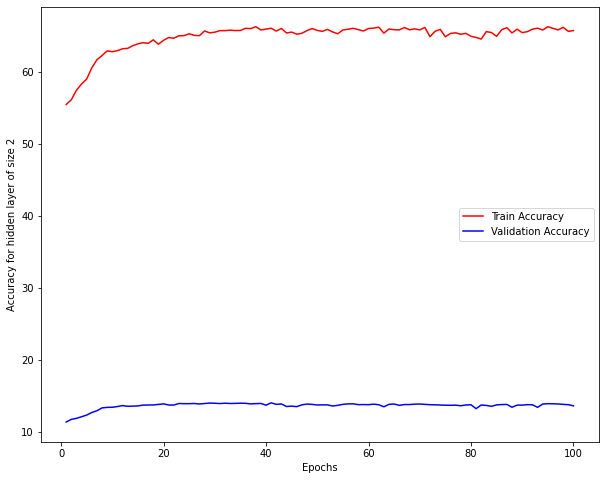

NeuralNet(
  (layer_1): Linear(in_features=2, out_features=4, bias=True)
  (layer_2): Linear(in_features=4, out_features=4, bias=True)
  (layer_out): Linear(in_features=4, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


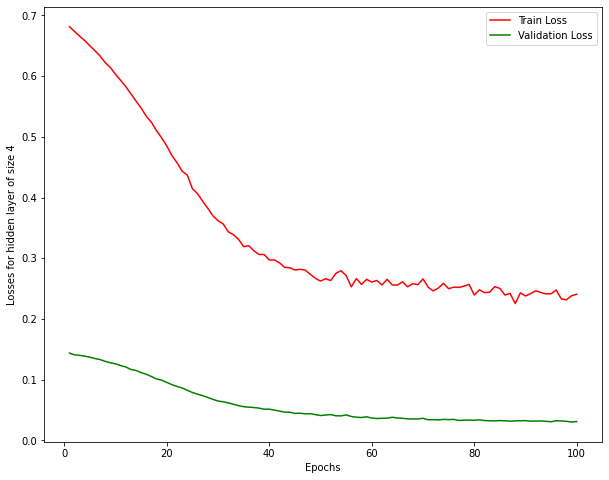

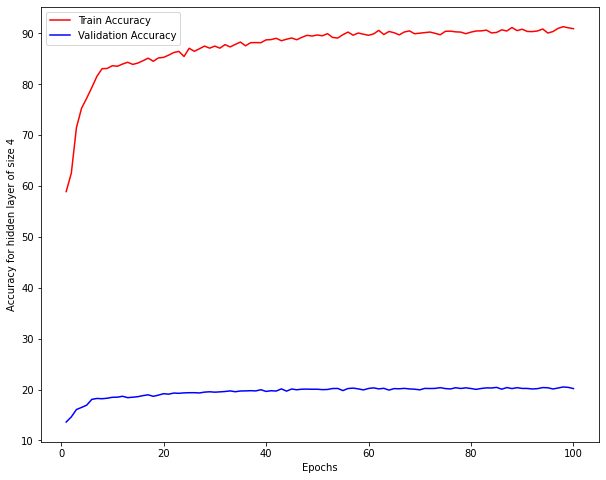

NeuralNet(
  (layer_1): Linear(in_features=2, out_features=6, bias=True)
  (layer_2): Linear(in_features=6, out_features=6, bias=True)
  (layer_out): Linear(in_features=6, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


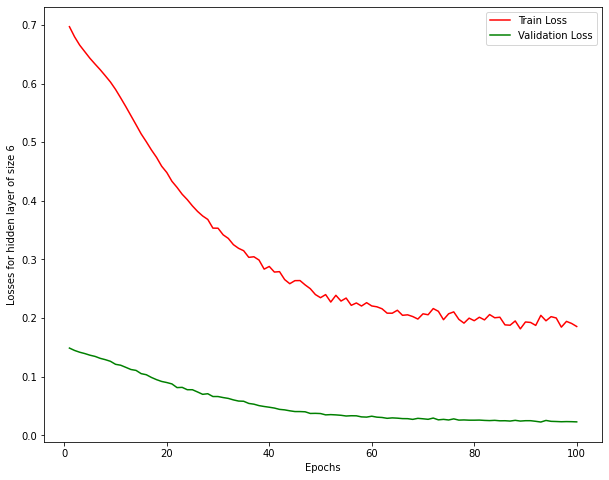

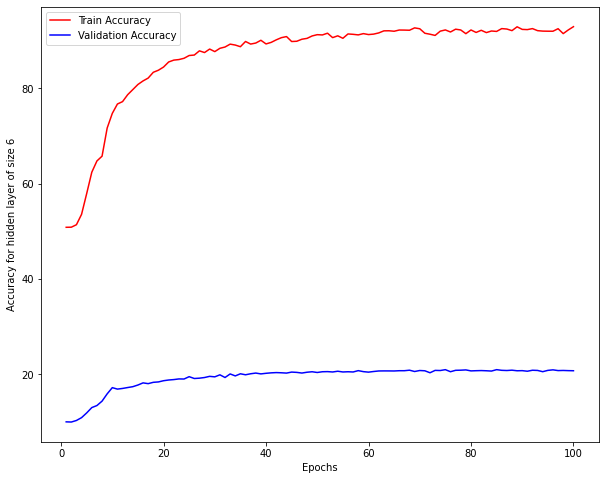

NeuralNet(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_out): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


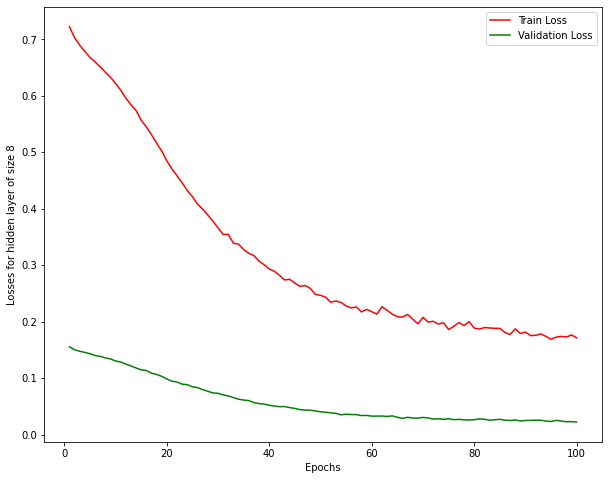

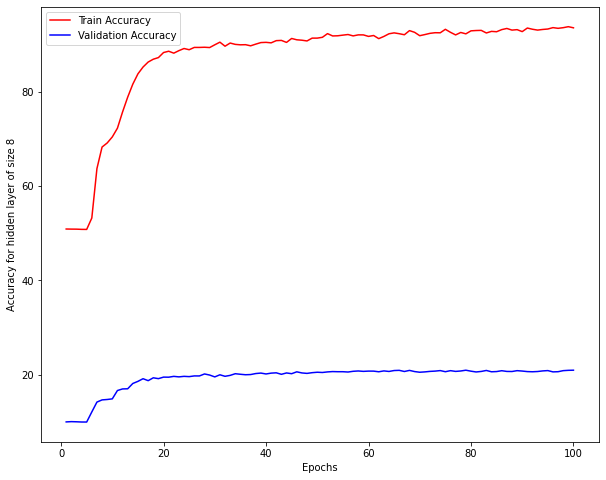

NeuralNet(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


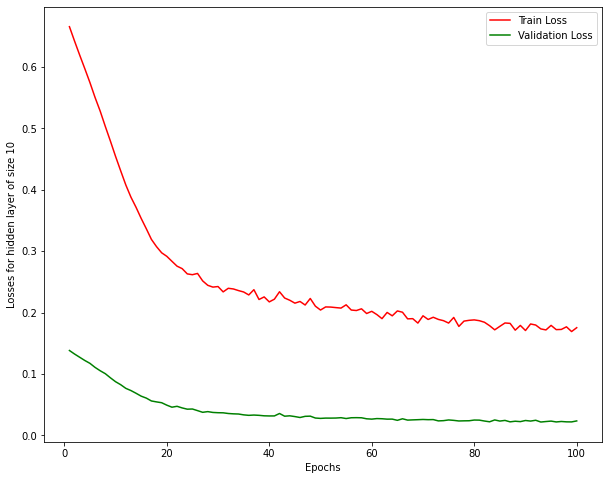

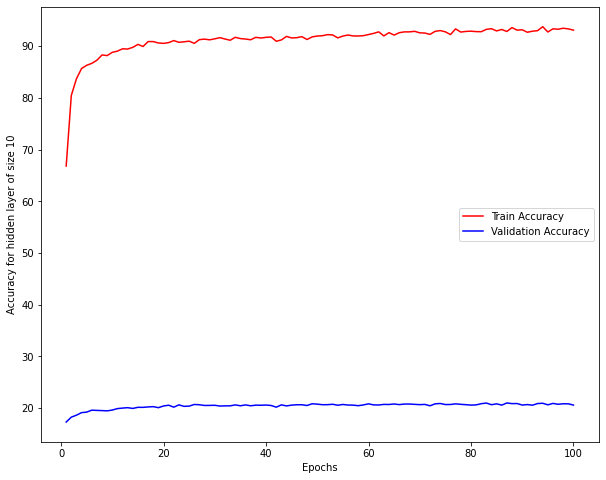

In [16]:
m = []
h=[2,4,6,8,10]
for hidden in h:
    model = NeuralNet(hidden)
    model.to(device)
    print(model)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(model.parameters(), lr=LR)
    stats = []
    for e in range(1, EPOCHS+1):
        model.train()
        stat = []
        epoch_loss = 0
        epoch_acc = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            acc = binary_acc(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        stat += [e,epoch_loss/len(train_loader),epoch_acc/len(train_loader)] 
        model.eval()   
        epoch_loss = 0
        epoch_acc = 0
        for X_batch, y_batch in valid_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            with torch.no_grad():
                y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            acc = binary_acc(y_pred, y_batch)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        stat += [epoch_loss/len(train_loader),epoch_acc/len(train_loader)]
        stats += [stat]
    Stats = pd.DataFrame(columns=['Epoch','Train_Loss','Train_Accuracy', 'Validation_Loss','Validation_Accuracy'],data=stats)
    plt.plot(Stats['Epoch'], Stats['Train_Loss'],'r')
    plt.plot(Stats['Epoch'], Stats['Validation_Loss'],'g')
    plt.xlabel('Epochs')
    plt.ylabel(f"Losses for hidden layer of size {hidden}")
    plt.legend(['Train Loss','Validation Loss'])
    plt.show()
    plt.plot(Stats['Epoch'], Stats['Train_Accuracy'],'r')
    plt.plot(Stats['Epoch'], Stats['Validation_Accuracy'],'b')
    plt.legend(['Train Accuracy','Validation Accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel(f"Accuracy for hidden layer of size {hidden}")
    plt.show()
    m += [min(Stats['Validation_Loss'])]    

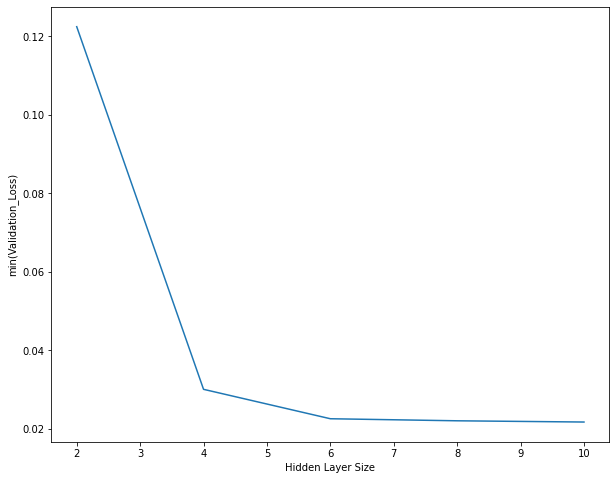

In [17]:
plt.plot(h,m)
plt.xlabel("Hidden Layer Size")
plt.ylabel("min(Validation_Loss)")
plt.show()

In [18]:
print(h)
print(m)

[2, 4, 6, 8, 10]
[0.12246792881112349, 0.03009906244087001, 0.022606291230640094, 0.022083667117582306, 0.021767717796789154]


## Thus best validation is for hidden layer size = 10

NeuralNet(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


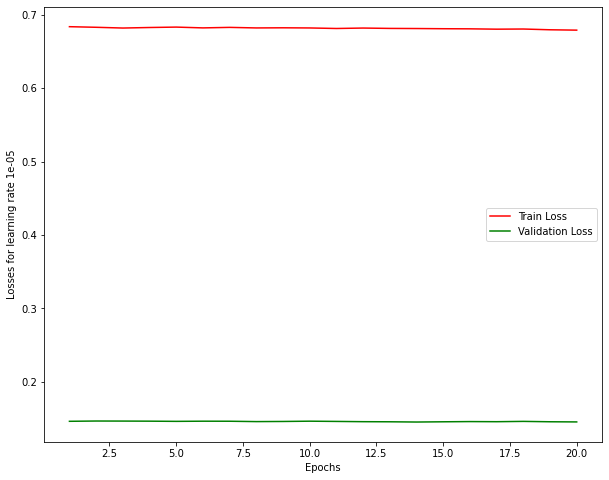

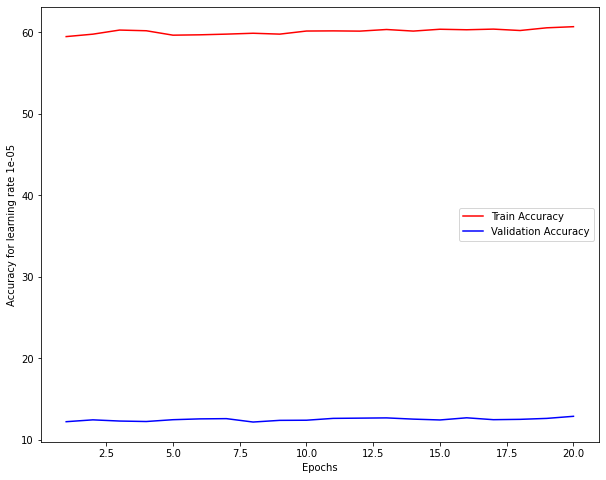

NeuralNet(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


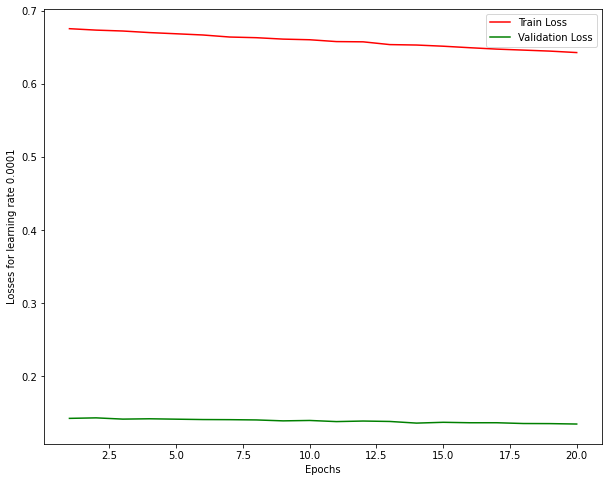

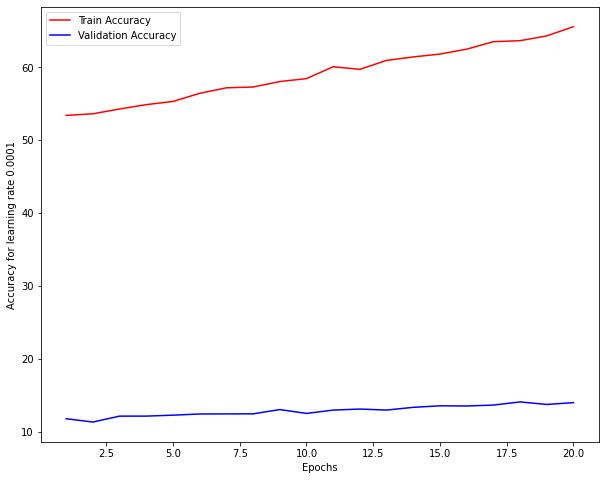

NeuralNet(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


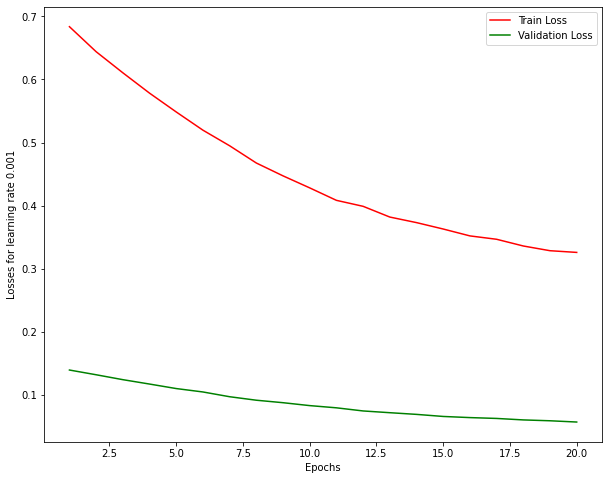

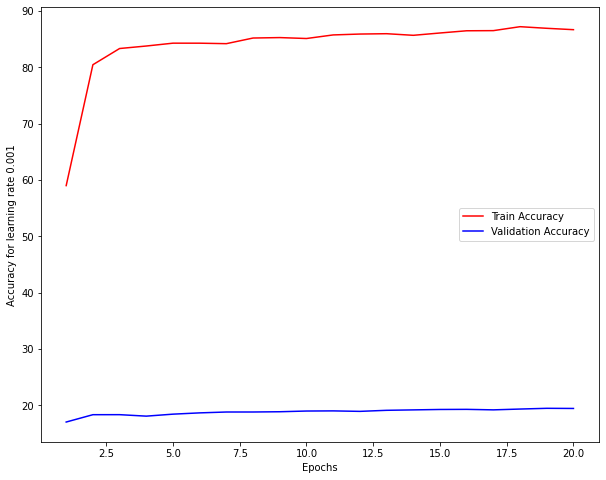

NeuralNet(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


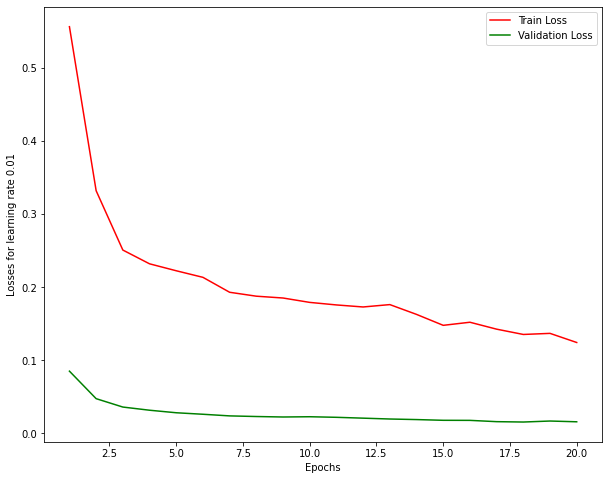

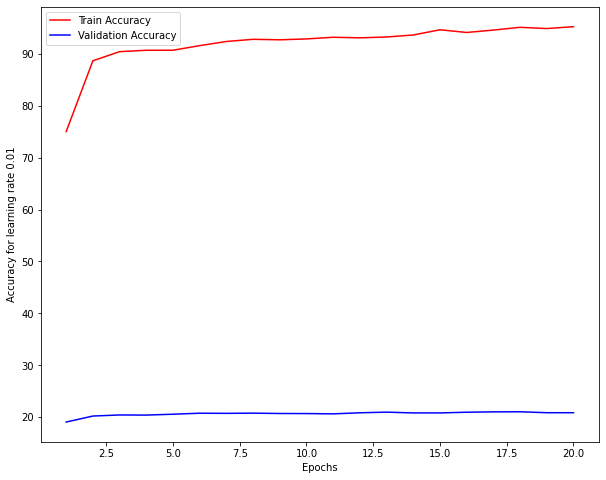

NeuralNet(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


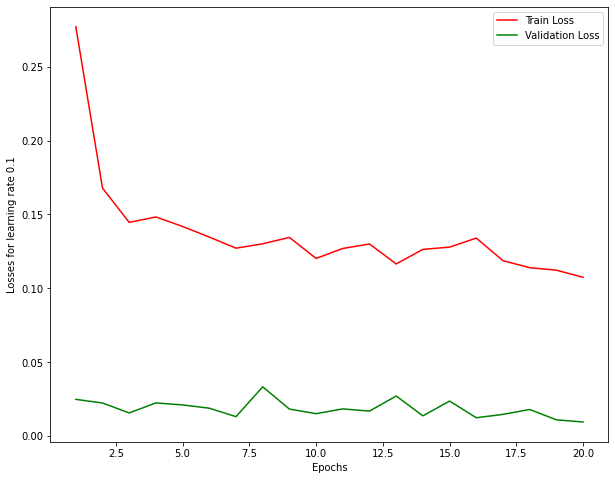

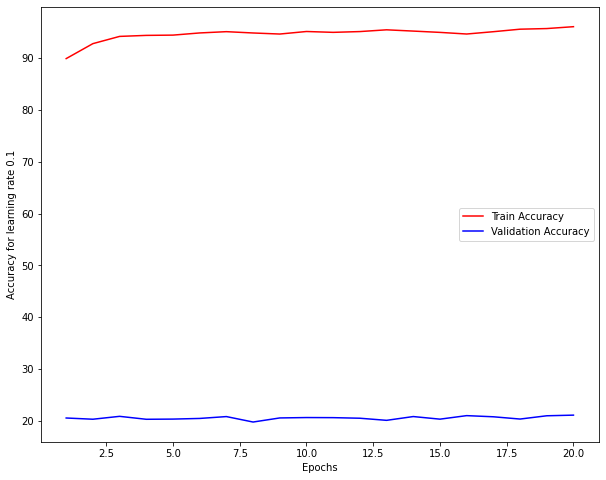

In [19]:
m = []
EPOCHS = 20
LR = [1e-5,1e-4,1e-3,1e-2,1e-1]
#Taking HL size as 10 since it gives minimum as above
for lr in LR:
    model = NeuralNet(10)
    model.to(device)
    print(model)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr)
    model.train()
    stats = []
    for e in range(1, EPOCHS+1):
        model.train()
        stat = []
        epoch_loss = 0
        epoch_acc = 0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            acc = binary_acc(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        stat += [e,epoch_loss/len(train_loader),epoch_acc/len(train_loader)] 
        model.eval()   
        epoch_loss = 0
        epoch_acc = 0
        for X_batch, y_batch in valid_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            with torch.no_grad():
                y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            acc = binary_acc(y_pred, y_batch)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        stat += [epoch_loss/len(train_loader),epoch_acc/len(train_loader)]
        stats += [stat]
    Stats = pd.DataFrame(columns=['Epoch','Train_Loss','Train_Accuracy', 'Validation_Loss','Validation_Accuracy'],data=stats)
    plt.plot(Stats['Epoch'], Stats['Train_Loss'],'r')
    plt.plot(Stats['Epoch'], Stats['Validation_Loss'],'g')
    plt.xlabel('Epochs')
    plt.ylabel(f"Losses for learning rate {lr}")
    plt.legend(['Train Loss','Validation Loss'])
    plt.show()
    plt.plot(Stats['Epoch'], Stats['Train_Accuracy'],'r')
    plt.plot(Stats['Epoch'], Stats['Validation_Accuracy'],'b')
    plt.legend(['Train Accuracy','Validation Accuracy'])
    plt.xlabel('Epochs')
    plt.ylabel(f"Accuracy for learning rate {lr}")
    plt.show()
    m += [min(Stats['Validation_Loss'])]    

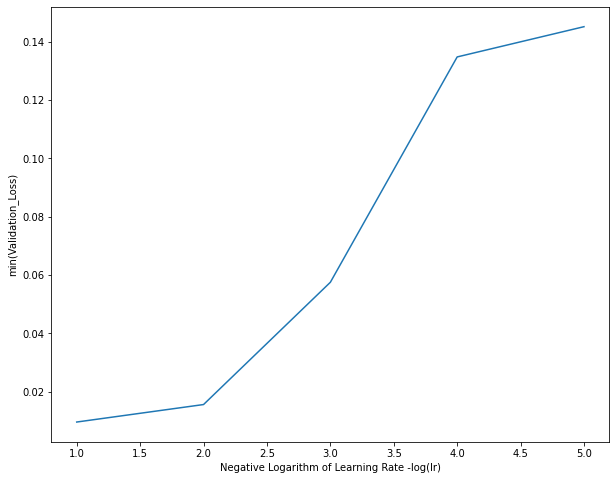

In [20]:
LR = [1e-5,1e-4,1e-3,1e-2,1e-1]
LR = -np.log10(np.array(LR))
plt.plot(LR,m)
plt.xlabel("Negative Logarithm of Learning Rate -log(lr)")
plt.ylabel("min(Validation_Loss)")
plt.show()

## Thus best Validation is for Learning Rate of 0.1 (1e-1)

NeuralNet(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_out): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (batchnorm1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Epoch 10: | Train_Loss: 0.14282 | Train_Acc: 94.622
          | Valid_Loss: 0.01524 | Valid_Acc: 20.686
Epoch 20: | Train_Loss: 0.12286 | Train_Acc: 95.378
          | Valid_Loss: 0.01266 | Valid_Acc: 20.883
Epoch 30: | Train_Loss: 0.10111 | Train_Acc: 96.378
          | Valid_Loss: 0.01456 | Valid_Acc: 20.870
Epoch 40: | Train_Loss: 0.08629 | Train_Acc: 96.952
          | Valid_Loss: 0.00757 | Valid_Acc: 21.062
Epoch 50: | Train_Loss: 0.07239 | Train_Acc: 97.570
          | Valid_Loss: 0.00942 | Valid_Acc: 20.854
Epoch 60: | Train_Loss: 0.06553 | Train_Acc: 97.556
          | Va

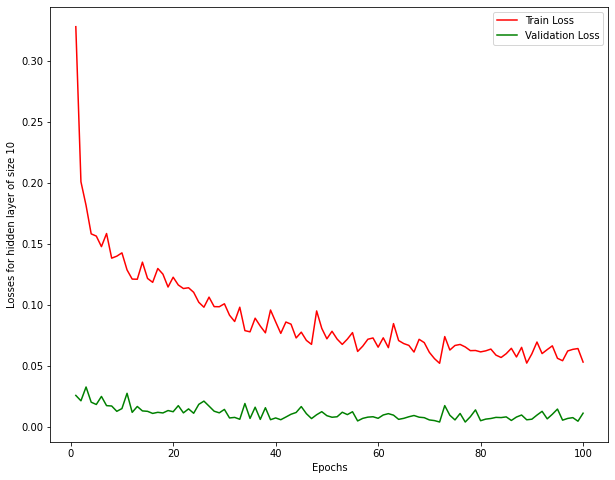

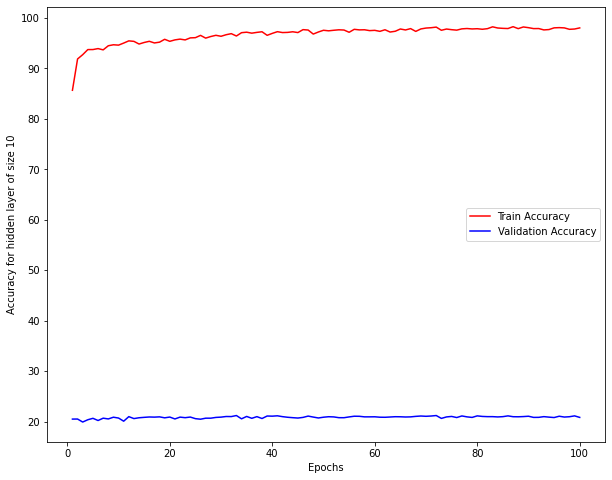

In [21]:
#thus lr = 1e-1 and hidden = 10
EPOCHS = 100
LR = 1e-1
hidden = 10
model = NeuralNet(hidden)
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=LR)
stats = []
for e in range(1, EPOCHS+1):
    model.train()
    stat = []
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        acc = binary_acc(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    if(e%10==0):
        print(f'Epoch {e}: | Train_Loss: {epoch_loss/len(train_loader):.5f} | Train_Acc: {epoch_acc/len(train_loader):.3f}')
    stat += [e,epoch_loss/len(train_loader),epoch_acc/len(train_loader)]    
    model.eval()
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in valid_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        with torch.no_grad():
            y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        acc = binary_acc(y_pred, y_batch)
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    if(e%10==0):
        print(f'          | Valid_Loss: {epoch_loss/len(train_loader):.5f} | Valid_Acc: {epoch_acc/len(train_loader):.3f}')
    stat += [epoch_loss/len(train_loader),epoch_acc/len(train_loader)]
    stats += [stat]
Stats = pd.DataFrame(columns=['Epoch','Train_Loss','Train_Accuracy', 'Validation_Loss','Validation_Accuracy'],data=stats)
plt.plot(Stats['Epoch'], Stats['Train_Loss'],'r')
plt.plot(Stats['Epoch'], Stats['Validation_Loss'],'g')
plt.xlabel('Epochs')
plt.ylabel(f"Losses for hidden layer of size {hidden}")
plt.legend(['Train Loss','Validation Loss'])
plt.show()
plt.plot(Stats['Epoch'], Stats['Train_Accuracy'],'r')
plt.plot(Stats['Epoch'], Stats['Validation_Accuracy'],'b')
plt.legend(['Train Accuracy','Validation Accuracy'])
plt.xlabel('Epochs')
plt.ylabel(f"Accuracy for hidden layer of size {hidden}")
plt.show()

## Final classification report

In [22]:
model.eval()
with torch.no_grad():
    y_pred = model(test_data.X_data)
y_actual = test_data.y_data
y_pred = torch.round(torch.sigmoid(y_pred))
print(y_pred.flatten())
print(y_actual.flatten())

print(classification_report(y_actual,y_pred))

tensor([0., 1., 0.,  ..., 0., 1., 0.])
tensor([0., 1., 0.,  ..., 0., 0., 0.])
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       766
         1.0       0.97      0.97      0.97       734

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500

